Notebook to get and clean the daa of ABC newspaper about covid19 vaccination

In [ ]:
from helpers import *

In [2]:
def get_articles_ABC(list_links_ABC): 
    
    articles_list_ABC=[]
    #Count
    extracted_articles=0 
    for i in list_links_ABC: 
        list_text=[]
        list_subheadlines=[]
    #     time.sleep(1)
        driver.get(i)
        title=driver.find_element_by_xpath('//h1').text
        try: 
            author=driver.find_element_by_xpath('//a[@class="nombre"]').text
        except:
            author = 'error'
        try: 
            date =driver.find_element_by_xpath('//time[@class="actualizado"]').text
        except: 
            date = 'error'
        texts = driver.find_elements_by_xpath('//span[@class="cuerpo-texto "]/p')
        for element in texts:
            list_text.append(element.text)
        text=" ".join(list_text); 
        try: 
            subheadlines = driver.find_elements_by_xpath('//h2')
            for element in subheadlines: 
                list_subheadlines.append(element.text)
            subheadline= ". ".join(list_subheadlines)

        except: 
            subheadline = 'error'
        extracted_articles += 1
        print(f'Extracted articles: {extracted_articles} of {len(list_links_ABC)}',end='\r')
        articles_list_ABC.append({'Title': title, 
                              'Subheadline':subheadline,
                              'Text':text,
                              'Authors': author, 
                              'Date': date,
                              'Link':i}) 
    return(articles_list_ABC)


In [59]:
def get_html_ABC_V2(list_links):
    #Count
    extracted_articles=0 
    extracted_articles_fail=0
    for i in list_links: 
        driver.get(i)
        try:
            if(driver.find_element_by_xpath('//span[@class="literal"]').text =="Mi cuenta"): 
                html = driver.page_source
            else: 
                time.sleep(2)
                if(driver.find_element_by_xpath('//span[@class="literal"]').text =="Mi cuenta"): 
                    html = driver.page_source
                else: 
                    time.sleep(2)
                html = driver.page_source
        except: 
            extracted_articles_fail += 1
            continue
        tail=i.split('/')[-1]
        extracted_articles += 1
        with open(f'/home/david/Escritorio/VACTINATION_PROJECT/HTMLs/ABC/{tail}.txt', 'w') as f: 
            f.write(html)
        print(f'Extracted articles: {extracted_articles} of {len(list_links)}  Extracted failed articles: {extracted_articles_fail}',end='\r')
        

In [154]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
def prueba(list_links):
    
    extracted_articles=0 
    extracted_articles_fail=0
    for i in list_links:
        driver.get(i)    
        try:
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//span[@class='literal' and contains(text(),'Mi cuenta')]")))
            html = driver.page_source
            tail=i.split('/')[-1]
            extracted_articles += 1
            with open(f'/home/david/Escritorio/VACTINATION_PROJECT/HTMLs/ABC/{tail}.txt', 'w') as f: 
                f.write(html)
            
        except: 
            print("fail")
            extracted_articles_fail += 1
            continue
        print(f'Extracted articles: {extracted_articles} of {len(list_links)}  Extracted failed articles: {extracted_articles_fail}',end='\r')
        

In [155]:
#Install Driver
# Versión Chrome 89.0.4389.114 (Build oficial) (64 bits)
driver = webdriver.Chrome(ChromeDriverManager().install())




====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST driver version for 96.0.4664
Driver [/home/david/.wdm/drivers/chromedriver/linux64/96.0.4664.45/chromedriver] found in cache


# ABC

In [156]:
search_url='https://www.abc.es/salud/vacunas/'
email = ''
password = ''
driver.get(search_url) 
time.sleep(1)
# Aceptar cookkies
driver.find_element_by_id("didomi-notice-agree-button").click()

In [157]:
def login(): 
    time.sleep(1)
    driver.find_element_by_xpath('//div[@id="test"]').click()
    time.sleep(3)
    driver.find_element_by_xpath("//input[@type='email']").send_keys(email)
    time.sleep(1)
    driver.find_element_by_xpath("//input[@type='password']").send_keys(password)
    time.sleep(1)
    driver.find_element_by_xpath("//input[@type='submit']").click()

In [158]:
login()

In [7]:
# There are 70pages of vacinnes, but just 41 are from Covid: 
# list_search_url =[]
# list_search_url.append("https://www.abc.es/salud/vacunas/pag-1.html" )
# for i in range(2, 41):
#     list_search_url.append(search_url+f"pag-{i}.html")

In [10]:
# list_links=[]
# for i in list_search_url: 
#     driver.get(i)
#     links = driver.find_elements_by_xpath('//h1/a')
#     for j in links: 
#         list_links.append(j.get_attribute('href'))

# # Store the list in a document
# with open("list_links_ABC.txt", 'w') as f:
#     for s in list_links:
#         f.write(str(s) + '\n')

In [159]:
with open("list_links_ABC.txt", 'r') as f:
    list_links_ABC = [line.rstrip('\n') for line in f]
    
# 3997


In [161]:
prueba(list_links_ABC)

failacted articles: 323 of 3997  Extracted failed articles: 0
failacted articles: 324 of 3997  Extracted failed articles: 1
failacted articles: 330 of 3997  Extracted failed articles: 2
failacted articles: 809 of 3997  Extracted failed articles: 3
failacted articles: 863 of 3997  Extracted failed articles: 4
failacted articles: 993 of 3997  Extracted failed articles: 5
failacted articles: 1252 of 3997  Extracted failed articles: 6
failacted articles: 2060 of 3997  Extracted failed articles: 7
failacted articles: 2396 of 3997  Extracted failed articles: 8
failacted articles: 2974 of 3997  Extracted failed articles: 9
failacted articles: 3455 of 3997  Extracted failed articles: 10
failacted articles: 3610 of 3997  Extracted failed articles: 11
failacted articles: 3627 of 3997  Extracted failed articles: 12
failacted articles: 3958 of 3997  Extracted failed articles: 13


In [3]:
import os
list_articles_ABC=[]
for filename in os.listdir("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/ABC/"):
    with open(os.path.join("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/ABC/", filename), 'r') as f:
        html_file = f.read()
    list_text=[]
    soup = BeautifulSoup(html_file, 'html.parser')
    try:
        title=soup.find("h1").text.strip()
    except: 
        title="error"
    try:
        author=soup.find(class_='nombre').text.strip()
    except: 
        author = "error"
    try:
        link=soup.find('link', rel='canonical')['href']
    except: 
        link="error"
    try:
        subheadline= soup.find(class_="subtitulo").text.strip()
    except: 
        subheadline="error"
    try:
        date= soup.time.attrs['datetime']
    except: 
        date="error"
    try:
        tweets = soup.find_all(attrs={"dir" : "ltr"})
        for tweet in tweets:
            tweet.decompose()
    except: 
        pass
    try:
        
#         tf=soup.find("span",class_="link-wrapper-hovercard").decompose()
        tf=soup.find(class_="cuerpo-texto").find_all("p")
        for p in tf:
            list_text.append(p.get_text().strip())
        text=' '.join(list_text).strip()
    except: 
        text= "error"
    list_articles_ABC.append({'Title': title, 
                          'Subheadline':subheadline,
                          'Text':text,
                          'Authors': author, 
                          'Date': date,
                          'Link':link}) 


In [4]:
articles_ABC = pd.DataFrame.from_dict(list_articles_ABC)

### CLEAN DATAFRAME

In [6]:
articles_ABC['Newspaper']= 'ABC'
articles_ABC['Country']= 'Spain'

In [7]:
# clean text
articles_ABC['Text']=articles_ABC['Text'].apply(preprocessor)

In [8]:
articles_ABC['n_words'] = articles_ABC.Text.apply(lambda x: len(str(x).split(' ')))

In [9]:
# articles_ABC[articles_ABC['Text'and'Date']=="error"]
articles_ABC=articles_ABC.drop(articles_ABC[articles_ABC['Text'and'Date']=="error"].index,inplace=False)
articles_ABC=articles_ABC.drop(articles_ABC[articles_ABC['n_words']<50].index,inplace=False)
articles_ABC=articles_ABC.drop(articles_ABC[articles_ABC.Text.str.contains("Si ya estás suscrito")].index,inplace=False)

In [10]:
articles_ABC=articles_ABC[articles_ABC.Text.str.contains("vacun|Vacu")|articles_ABC.Title.str.contains("vacun|Vacu")|articles_ABC.Subheadline.str.contains("vacun|Vacu")]

In [18]:
import datetime
from datetime import datetime

# DATE
for index,row in articles_ABC.iterrows(): 
    try:
        articles_ABC['Date'][index] =datetime.strptime(articles_ABC['Date'][index], '%Y-%m-%dT%H:%M:%SZ').date()
    except: 
        continue

In [19]:
articles_ABC.sort_values('Date')

,Title,Subheadline,Text,Authors,Date,Link,Newspaper,Country,n_words
322,"Tengo gripe, ¿cuándo debo ir a urgencias?",La gripe puede ser potencialmente grave en beb...,"Coincidiendo con la bajada de temperaturas, l...",ABC Salud,2020-01-28,https://www.abc.es/salud/enfermedades/abci-ten...,ABC,Spain,734
1325,Los afectados por un brote de paperas comunita...,Más de la mitad de los afectados son varones y...,La Junta de Castilla y León ha confirmado 58 c...,ABC,2020-01-28,https://www.abc.es/espana/castilla-leon/abci-a...,ABC,Spain,266
2990,La gripe alcanza el umbral más alto de los últ...,Se han hecho 1.127 contratos de refuerzo y se ...,"Si usted no tiene la gripe en este momento, ti...",Sara Medialdea,2020-01-28,https://www.abc.es/espana/madrid/abci-gripe-al...,ABC,Spain,311
3509,Nueve millones de niños podrían morir en la pr...,"Expertos en salud global, reunidos en Barcelon...",Cada 39 segundos muere un niño en el mundo por...,Esther Armora,2020-01-29,https://www.abc.es/espana/catalunya/abci-nueve...,ABC,Spain,822
1304,"«Una vacuna, hasta su aprobación, tarda entre ...",error,"Seth Berkley, Director Ejecutivo de Gavi, la ...",R. I.,2020-02-03,https://www.abc.es/salud/enfermedades/abci-vac...,ABC,Spain,1784
...,...,...,...,...,...,...,...,...,...
2504,Castilla-La Mancha confirma tres casos de la v...,El consejero de Sanidad ha precisado que de lo...,"El consejero de Sanidad de Castilla-La Mancha,...",ABC,2021-10-27,https://www.abc.es/espana/castilla-la-mancha/a...,ABC,Spain,547
3250,Un panel de la FDA recomienda la vacuna de Pfi...,Se espera que el organismo conceda su autoriza...,Un panel independiente de expertos de la Admin...,Javier Ansorena,2021-10-27,https://www.abc.es/sociedad/abci-panel-recomie...,ABC,Spain,663
387,Dosis de refuerzo para los vacunados con Janss...,Los vacunados contra el Covid-19 con el suero ...,Diferentes estudios han demostrado que la prot...,ABC,2021-10-27,https://www.abc.es/sociedad/abci-dosis-refuerz...,ABC,Spain,383
302,¿Por qué combinar la vacuna de Janssen con una...,"Hay evidencia de que, además de seguras, estas...","A partir del próximo 15 de noviembre, las pers...",Cristina Garrido,2021-10-27,https://www.abc.es/salud/enfermedades/abci-com...,ABC,Spain,935


In [20]:
articles_ABC=articles_ABC.drop_duplicates()

In [25]:
articles_ABC[articles_ABC.duplicated('Link', keep=False) == True]

,Title,Subheadline,Text,Authors,Date,Link,Newspaper,Country,n_words


In [26]:
articles_ABC[articles_ABC['Authors']=="Irene Martel"]

,Title,Subheadline,Text,Authors,Date,Link,Newspaper,Country,n_words
61,Vacunación en España | Datos y porcentajes de ...,La población vacunada con la pauta completa su...,La vacunación con una dosis en España se sitúa...,Irene Martel,2021-09-17,https://www.abc.es/sociedad/abci-vacunacion-es...,ABC,Spain,1357
653,El mapa de las UCI en España: la ocupación por...,Las Unidades de Cuidados Intensivos (UCI) en E...,La vacunación en España avanza a buen ritmo. S...,Irene Martel,2021-07-29,https://www.abc.es/sociedad/abci-mapa-uci-esap...,ABC,Spain,384
2748,¿Qué vacuna está poniendo cada país contra el ...,Pfizer y AstraZeneca son las vacunas que se ad...,El 27 de diciembre de 2020 comenzó la vacunaci...,Irene Martel,2021-05-27,https://www.abc.es/sociedad/abci-vacunas-coron...,ABC,Spain,1114
3276,Qué es el pasaporte sanitario común de vacunación,La Comisión Europea pide a los países que en e...,El pasado martes 19 de enero la Comisión Europ...,Irene Martel,2021-02-26,https://www.abc.es/sociedad/abci-que-es-pasapo...,ABC,Spain,633
3461,Los efectos secundarios de las vacunas contra ...,Más de la mitad de las reacciones adversas rel...,"Actualmente, en España, han recibido la pauta ...",Irene Martel,2021-07-29,https://www.abc.es/sociedad/abci-efectos-secun...,ABC,Spain,696
3746,Nueva cepa coronavirus: ¿Por qué se parecen ta...,Nuevas cepas de coronavirus están apareciendo ...,La existencia de nuevas cepas o varientas del ...,Irene Martel,2021-01-12,https://www.abc.es/sociedad/abci-similitudes-n...,ABC,Spain,552
3834,Cuántas vacunas contra el coronavirus han sido...,Actualmente en Europa están siendo administrad...,El 11 de marzo de 2020 la Organización Mundial...,Irene Martel,2021-06-10,https://www.abc.es/sociedad/abci-cuantas-vacun...,ABC,Spain,536


In [14]:
articles_ABC.to_csv(r'/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_ABC_30_11_21.csv', index = False)

In [15]:
df=pd.read_csv('/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_ABC_30_11_21.csv')
df

,Title,Subheadline,Text,Authors,Date,Link,Newspaper,Country,n_words
0,Detectan anticuerpos contra la covid-19 en un ...,"Aunque se trata de un único caso, el hecho de ...",La administración de vacunas frente a la covid...,R.Ibarra,2021-10-20,https://www.abc.es/salud/enfermedades/abci-det...,ABC,Spain,136
1,Cómo obtener el certificado de vacunación en C...,El Certificado Covid Digital de la Unión Europ...,El pasado 1 de julio entró en vigor el Certifi...,ABC,2021-07-26,https://www.abc.es/espana/canarias/abci-obtene...,ABC,Spain,383
2,La Comunidad Valenciana comienza la vacunación...,Ximo Puig anuncia la fecha para el final de la...,La Comunidad Valenciana ha arrancado este vier...,D. V.,2021-04-28,https://www.abc.es/espana/comunidad-valenciana...,ABC,Spain,214
3,Cataluña registra 67 muertes por Covid en 24 h...,La comunidad supera los 500.000 contagiados de...,Cataluña ha registrado hasta este domingo 503....,ABC,2021-01-31,https://www.abc.es/espana/catalunya/abci-catal...,ABC,Spain,307
4,Reino Unido anuncia que podría tener disponibl...,"Las pruebas realizadas en monos, aunque en un ...",Treinta millones de dosis de la vacuna contra ...,Ivannia Salazar,2020-05-18,https://www.abc.es/sociedad/abci-reino-unido-a...,ABC,Spain,446
...,...,...,...,...,...,...,...,...,...
3711,Más del 20% de los trabajadores de residencias...,"Entre los ancianos, la inmensa mayoría ha mani...",Más del 20% de los trabajadores de residencias...,R. Pérez,2020-12-28,https://www.abc.es/espana/aragon/abci-mas-20-p...,ABC,Spain,302
3712,Cuánto tiempo debe pasar entre la primera y la...,El tiempo que debe pasar entre la primera dosi...,La llegada de la vacuna del coronavirus supuso...,Armando Hueso,2021-01-22,https://www.abc.es/sociedad/abci-cuanto-tiempo...,ABC,Spain,439
3713,Darias se muestra «satisfecha» con la decisión...,Este es el documento de consentimiento que se ...,"La ministra de Sanidad, Carolina Darias, se ha...",EP,2021-05-25,https://www.abc.es/sociedad/abci-darias-muestr...,ABC,Spain,539
3714,"Las familias españolas, las más favorables a l...",Investigadores del Hospital Universitario de G...,Las familias españolas son las más favorables ...,EFE,2020-04-21,https://www.abc.es/familia/padres-hijos/abci-f...,ABC,Spain,586


In [143]:
df.sort_values('Date')

,Title,Subheadline,Text,Authors,Date,Link,Newspaper,Country,n_words
2804,La gripe alcanza el umbral más alto de los últ...,Se han hecho 1.127 contratos de refuerzo y se ...,"Si usted no tiene la gripe en este momento, ti...",Sara Medialdea,2020-01-28,https://www.abc.es/espana/madrid/abci-gripe-al...,ABC,Spain,311
305,"Tengo gripe, ¿cuándo debo ir a urgencias?",La gripe puede ser potencialmente grave en beb...,"Coincidiendo con la bajada de temperaturas, l...",ABC Salud,2020-01-28,https://www.abc.es/salud/enfermedades/abci-ten...,ABC,Spain,734
1241,Los afectados por un brote de paperas comunita...,Más de la mitad de los afectados son varones y...,La Junta de Castilla y León ha confirmado 58 c...,ABC,2020-01-28,https://www.abc.es/espana/castilla-leon/abci-a...,ABC,Spain,266
3297,Nueve millones de niños podrían morir en la pr...,"Expertos en salud global, reunidos en Barcelon...",Cada 39 segundos muere un niño en el mundo por...,Esther Armora,2020-01-29,https://www.abc.es/espana/catalunya/abci-nueve...,ABC,Spain,822
1220,"«Una vacuna, hasta su aprobación, tarda entre ...",error,"Seth Berkley, Director Ejecutivo de Gavi, la ...",R. I.,2020-02-03,https://www.abc.es/salud/enfermedades/abci-vac...,ABC,Spain,1784
...,...,...,...,...,...,...,...,...,...
287,¿Por qué combinar la vacuna de Janssen con una...,"Hay evidencia de que, además de seguras, estas...","A partir del próximo 15 de noviembre, las pers...",Cristina Garrido,2021-10-27,https://www.abc.es/salud/enfermedades/abci-com...,ABC,Spain,935
3049,Un panel de la FDA recomienda la vacuna de Pfi...,Se espera que el organismo conceda su autoriza...,Un panel independiente de expertos de la Admin...,Javier Ansorena,2021-10-27,https://www.abc.es/sociedad/abci-panel-recomie...,ABC,Spain,663
2349,Castilla-La Mancha confirma tres casos de la v...,El consejero de Sanidad ha precisado que de lo...,"El consejero de Sanidad de Castilla-La Mancha,...",ABC,2021-10-27,https://www.abc.es/espana/castilla-la-mancha/a...,ABC,Spain,547
364,Dosis de refuerzo para los vacunados con Janss...,Los vacunados contra el Covid-19 con el suero ...,Diferentes estudios han demostrado que la prot...,ABC,2021-10-27,https://www.abc.es/sociedad/abci-dosis-refuerz...,ABC,Spain,383


In [4]:
df.Link[3401]

'https://www.abc.es/deportes/tenis/abci-tenis-reacio-vacunas-202110260102_noticia.html'

# NER

In [3]:
df_ner= ner(df.Text,"es_core_news_sm")

In [4]:
df_ner=df_ner.groupby(['Entity','Label']).size().reset_index(name='Frequency')

In [5]:
#Eliminate wrong entitites
list_wrong_entities=['Además','aseguró', 'Según','según','Así','También','había','Lea','habían','Sólo','aún','días','Está']
df_ner=df_ner[~df_ner.Entity.isin(list_wrong_entities)]

Text(0.5, 1.0, 'Most frequent NE PERSON')

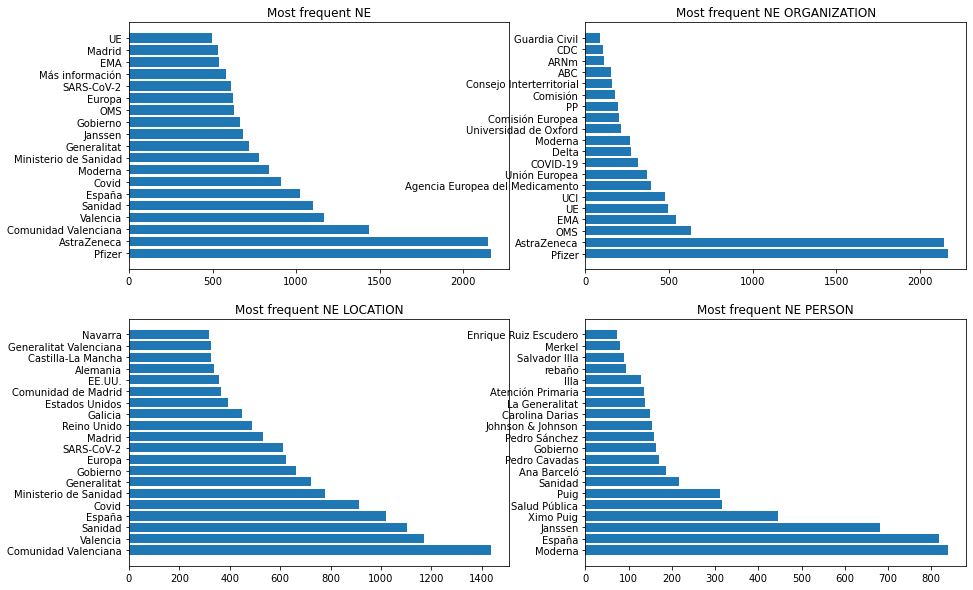

In [6]:
fig, axs = plt.subplots(2, 2,figsize=(15,10))
axs[0, 0].barh(y=df_ner.sort_values('Frequency',ascending=False).head(20)['Entity'],width=df_ner.sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,0].set_title('Most frequent NE')
axs[0, 1].barh(y=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,1].set_title('Most frequent NE ORGANIZATION')
axs[1, 0].barh(y=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,0].set_title('Most frequent NE LOCATION')
axs[1, 1].barh(y=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,1].set_title('Most frequent NE PERSON')